#4A
Generate 61 points fortarget = sin x , where x ∈ [−3, 3]. Use this dataset to train
two layer neural networks using gradient descent learning algorithm. Draw two curves with
different colours, for target and output(y) of the trained neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate dataset
x = np.linspace(-3, 3, 61)  # 61 points between -3 and 3
y_target = np.sin(x)

In [3]:
# Define neural network architecture
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 10000

In [4]:
# Initialize weights and biases
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

In [5]:
# Define activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of activation function
def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(x.reshape(-1, 1), weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output = np.dot(hidden_output, weights_hidden_output) + bias_output

    # Backpropagation
    error = y_target.reshape(-1, 1) - output
    d_output = error
    d_hidden_output = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += x.reshape(-1, 1).T.dot(d_hidden_output) * learning_rate
    bias_hidden += np.sum(d_hidden_output, axis=0, keepdims=True) * learning_rate

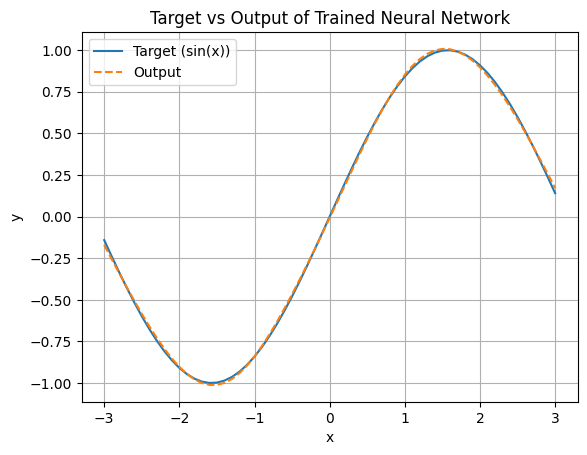

In [7]:
# Plotting the target and output curves
plt.plot(x, y_target, label='Target (sin(x))')
plt.plot(x, output.flatten(), label='Output', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target vs Output of Trained Neural Network')
plt.legend()
plt.grid(True)
plt.show()

#4B
Use MNIST dataset to train neural networks using gradient descent learning
algorithm.Experiments with various Architectures of neural networks, and with different
activation functions for hidden and output layers.

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
def create_model(hidden_layers=1, neurons=64, activation='relu', input_shape=(28, 28)):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape)) # Flatten the input
  for _ in range(hidden_layers):
    model.add(layers.Dense(neurons, activation=activation)) # Add hidden layers
  model.add(layers.Dense(10, activation='softmax')) # Output layer with softmax activation
  return model
# Example: Create a model with 2 hidden layers, 64 neurons each, using ReLU activation
model = create_model(hidden_layers=2, neurons=64, activation='relu', input_shape=(28, 28))

In [14]:
model.compile(optimizer='sgd', # Stochastic Gradient Descent
loss='sparse_categorical_crossentropy', # Loss function for integers
metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 2ms/step - loss: 0.7122 - accuracy: 0.8119 - val_loss: 0.2893 - val_accuracy: 0.9192
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3187 - accuracy: 0.9087 - val_loss: 0.2264 - val_accuracy: 0.9338
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9240 - val_loss: 0.1973 - val_accuracy: 0.9452
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2294 - accuracy: 0.9341 - val_loss: 0.1757 - val_accuracy: 0.9515
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2031 - accuracy: 0.9417 - val_loss: 0.1610 - val_accuracy: 0.9547
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1836 - accuracy: 0.9474 - val_loss: 0.1517 - val_accuracy: 0.9562
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9510 - val_loss: 0.1397 - val_accuracy:

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1466 - accuracy: 0.9555
Test Accuracy: 0.9555
